In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("data/gemstone.csv")

In [5]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df,title="pandas profiling report")

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\waghu\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'VS2'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [11]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [12]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [13]:
cut_map={'Fair':1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [14]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [15]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline


In [17]:
df.drop('id',axis=1,inplace=True)

In [18]:
# Dependant and independant variables
X=df.drop('price',axis=1)
y=df['price']

In [19]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [20]:
import seaborn as sns

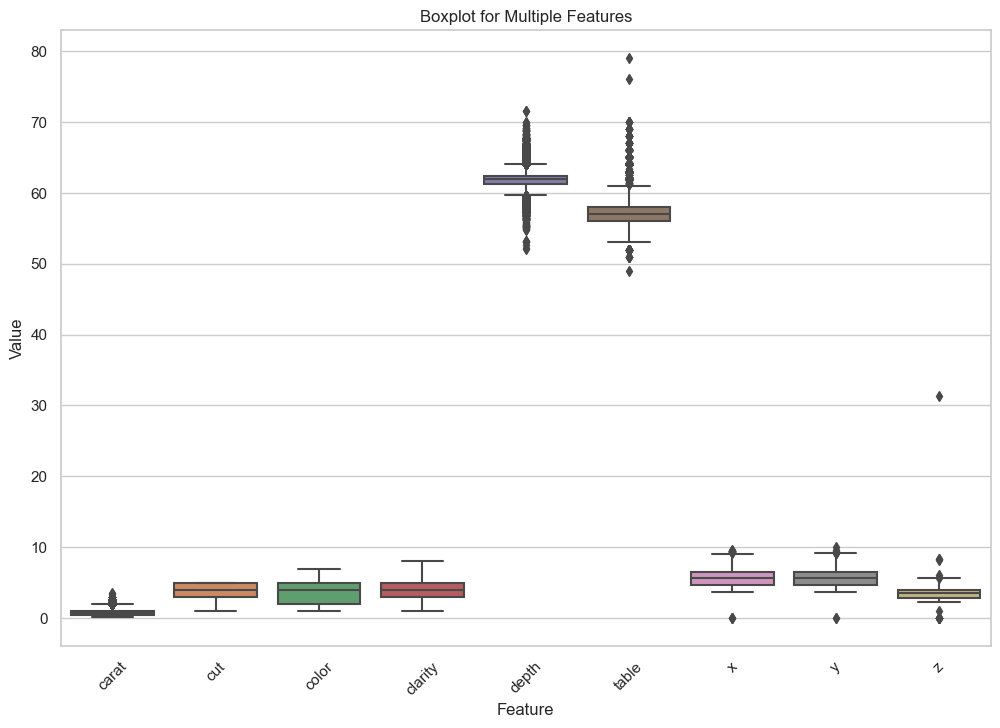

In [21]:
x_melted = X.melt( var_name='Feature', value_name='Value')

# Create the boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Feature', y='Value', data=x_melted)
plt.title('Boxplot for Multiple Features')
plt.xticks(rotation=45)
plt.show()

In [22]:
X.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,4.132152,3.516157,3.975084,61.820574,57.227675,5.715312,5.720094,3.534246
std,0.462688,0.994157,1.623091,1.501776,1.081704,1.918844,1.109422,1.102333,0.688922
min,0.200000,1.000000,1.000000,1.000000,52.100000,49.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,2.000000,3.000000,61.300000,56.000000,4.700000,4.710000,2.900000
50%,0.700000,4.000000,4.000000,4.000000,61.900000,57.000000,5.700000,5.720000,3.530000
75%,1.030000,5.000000,5.000000,5.000000,62.400000,58.000000,6.510000,6.510000,4.030000
max,3.500000,5.000000,7.000000,8.000000,71.600000,79.000000,9.650000,10.010000,31.300000


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=22)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Scratch model training

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense,Dropout


In [28]:
pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/db/5d/945296512980b0827e93418514c8be9236baa6f0a1e8ca8be3a2026665b0/keras_tuner-1.4.7-py3-none-any.whl.metadata
  Obtaining dependency information for kt-legacy from https://files.pythonhosted.org/packages/16/53/aca9f36da2516db008017db85a1f3cafaee0efc5fc7a25d94c909651792f/kt_legacy-1.0.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   --------- ----------------------------- 30.7/129.1 kB 435.7 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/129.1 kB 393.8 kB/s eta 0:00:01
   ------------------------ -------------- 81.9/129.1 kB 459.5 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/129.1 kB 467.6 kB/s eta 0:00:01
   -------------------------------------- 129.1/129.1 kB

In [30]:
import keras_tuner as kt

In [26]:
model=Sequential()

In [27]:
model.add(Dense(250,activation='relu',input_dim=9))
model.add(Dense(100,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               2500      
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 28621 (111.80 KB)
Trainable params: 28621 (111.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss='mean_absolute_error',optimizer='Adam')

In [30]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100

3630/3630 [==============================] - 17s 4ms/step - loss: 693.7649 - val_loss: 400.4584
Epoch 2/100
3630/3630 [==============================] - 11s 3ms/step - loss: 439.6911 - val_loss: 385.8896
Epoch 3/100
3630/3630 [==============================] - 12s 3ms/step - loss: 425.1751 - val_loss: 371.5728
Epoch 4/100
3630/3630 [==============================] - 17s 5ms/step - loss: 416.8081 - val_loss: 361.0804
Epoch 5/100
3630/3630 [==============================] - 13s 4ms/step - loss: 409.1378 - val_loss: 356.5431
Epoch 6/100
3630/3630 [==============================] - 12s 3ms/step - loss: 401.0087 - val_loss: 349.8665
Epoch 7/100
3630/3630 [==============================] - 11s 3ms/step - loss: 396.3952 - val_loss: 341.3534
Epoch 8/100
3630/3630 [==============================] - 14s 4ms/step - loss: 393.1911 - val_loss: 339.5171
Epoch 9/100
3630/3630 [==============================] - 15s 4ms/step - loss: 388.0225 - val_loss: 360.3259
Epoch 10/100
3630/3630 [===

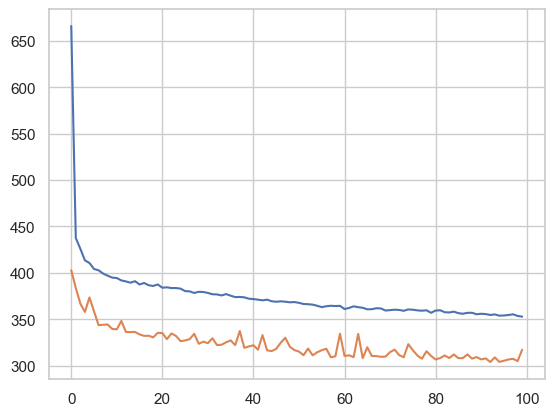

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
y_pred=model.predict(X_test_scaled)

1513/1513 [==============================] - 1s 933us/step


In [45]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
r2_score(y_pred=y_pred,y_true=y_test)

0.9778351019839622

In [ ]:
X_test_scaled[5]

array([-1.05943875, -0.13227179,  0.29719971,  0.68331721, -0.57277401,
        0.92413559, -1.27462514, -1.26003787, -1.29484785])

In [ ]:
model.predict(X_test_scaled[111].reshape(1,9))

1/1 [==============================] - 0s 50ms/step


array([[1869.697]], dtype=float32)

In [ ]:
y_test.iloc[111]

1948

In [ ]:
mean_squared_error(y_pred=y_pred,y_true=y_test)

355816.4770616939

In [ ]:
y2=y_pred.tolist()

In [43]:
def evaluate_model(test,predicted):
    mae=mean_absolute_error(test,predicted)
    mse=mean_squared_error(test,predicted)
    rmse=np.sqrt(mean_squared_error(test,predicted))
    r2_S=r2_score(test,predicted)
    return mae,rmse,r2_S,mse
mae,rmse,r2_s,mse=evaluate_model(y_test,y_pred)
print("Model Performance")
print("mean squared error : ",mse)
print("Root mean squared error : ",rmse)
print("Mean absolute error : ",mae)
print("R2 score : ",r2_s*100)

In [ ]:
1013**2

1026169

In [ ]:
# After adding a dropout layer
mae,rmse,r2_s,mse=evaluate_model(y_test,y_pred)
print("Model Performance")
print("mean squared error : ",mse)
print("Root mean squared error : ",rmse)
print("Mean absolute error : ",mae)
print("R2 score : ",r2_s*100)

Model Performance
mean squared error :  371847.34309153573
Root mean squared error :  609.7928690067929
Mean absolute error :  313.99879241916875
R2 score :  97.6836490245702


In [32]:
## Hyperparameter tunning 
# from itertools import count

def build_model(hp):
  model=Sequential()
  counter=0
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter==0:
      model.add(
          Dense(
              units=hp.Int('units'+str(i),min_value=32,max_value=512,step=32),
              activation='relu',
              input_dim=9
          )
      )
    else:
      model.add(
          Dense(
              units=hp.Int('units'+str(i),min_value=32,max_value=512,step=32),
              activation='relu'
          )
      )
  model.add(
      Dense(1)
  )
  counter+=1
  model.compile(
      optimizer=keras.optimizers.Adam(
          hp.Choice('learning rate',values=[1e-2,1e-3,1e-4])
      ),

      loss='mean_absolute_error',
      # metrics=[r2_score]
  )
  return model

In [34]:
tunner = kt.RandomSearch(build_model,objective='val_loss',max_trials=10,directory='parameter_tunner',project_name='trial_frist')

In [35]:
tunner.search(X_train_scaled,y_train,epochs=4,validation_data=(X_test_scaled,y_test))

Trial 10 Complete [00h 03m 21s]
val_loss: 330.1454162597656

Best val_loss So Far: 313.41973876953125
Total elapsed time: 00h 22m 16s


In [36]:
tunner.results_summary()

Results summary
Results in parameter_tunner\trial_frist
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 06 summary
Hyperparameters:
num_layers: 6
units0: 192
learning rate: 0.01
units1: 416
units2: 64
units3: 32
units4: 96
units5: 352
units6: 352
units7: 256
units8: 192
units9: 256
Score: 313.41973876953125

Trial 04 summary
Hyperparameters:
num_layers: 10
units0: 352
learning rate: 0.001
units1: 160
units2: 128
units3: 512
units4: 416
units5: 288
units6: 288
units7: 256
units8: 448
units9: 32
Score: 315.5710754394531

Trial 02 summary
Hyperparameters:
num_layers: 6
units0: 64
learning rate: 0.01
units1: 96
units2: 352
units3: 32
units4: 32
units5: 32
Score: 318.31640625

Trial 08 summary
Hyperparameters:
num_layers: 8
units0: 96
learning rate: 0.0001
units1: 256
units2: 448
units3: 352
units4: 512
units5: 256
units6: 224
units7: 480
units8: 288
units9: 352
Score: 320.10357666015625

Trial 03 summary
Hyperparameters:
num_layers: 9
units0: 448
learning rate: 0.

In [37]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'units0': 192,
 'learning rate': 0.01,
 'units1': 416,
 'units2': 64,
 'units3': 32,
 'units4': 96,
 'units5': 352,
 'units6': 352,
 'units7': 256,
 'units8': 192,
 'units9': 256}

In [39]:
model=tunner.get_best_models(num_models=1)[0]

In [40]:
model.fit(X_train_scaled,y_train,initial_epoch=4,epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 5/100
4537/4537 [==============================] - 31s 6ms/step - loss: 339.4784 - val_loss: 322.3352
Epoch 6/100
4537/4537 [==============================] - 31s 7ms/step - loss: 335.0700 - val_loss: 311.7338
Epoch 7/100
4537/4537 [==============================] - 29s 6ms/step - loss: 329.4144 - val_loss: 309.4646
Epoch 8/100
4537/4537 [==============================] - 29s 6ms/step - loss: 327.1449 - val_loss: 338.4045
Epoch 9/100
4537/4537 [==============================] - 29s 6ms/step - loss: 323.9624 - val_loss: 424.7571
Epoch 10/100
4537/4537 [==============================] - 30s 7ms/step - loss: 324.2822 - val_loss: 305.3700
Epoch 11/100
4537/4537 [==============================] - 30s 7ms/step - loss: 320.8049 - val_loss: 311.3384
Epoch 12/100
4537/4537 [==============================] - 30s 7ms/step - loss: 320.3102 - val_loss: 343.2322
Epoch 13/100
4537/4537 [==============================] - 29s 6ms/step - loss: 317.3722 - val_loss: 333.7324
Epoch 14/100
4537/4537 [

In [41]:
y_pred=model.predict(X_test_scaled)

1513/1513 [==============================] - 3s 2ms/step


In [46]:
mae,rmse,r2_s,mse=evaluate_model(y_test,y_pred)
print("Model Performance")
print("mean squared error : ",mse)
print("Root mean squared error : ",rmse)
print("Mean absolute error : ",mae)
print("R2 score : ",r2_s*100)

Model Performance
mean squared error :  337559.49044405937
Root mean squared error :  580.9987008970496
Mean absolute error :  296.0504586713671
R2 score :  97.89723855909546


In [68]:
model.predict(X_test_scaled[1].reshape(1,9))

1/1 [==============================] - 0s 21ms/step


array([[728.7409]], dtype=float32)

In [69]:
y_test.iloc[1]

673

In [62]:
X_test_scaled[20].reshape(1,9)

array([[-0.82202463,  0.87407377, -0.9350129 ,  2.01530754, -0.57277401,
        -0.64016894, -0.84234465, -0.81588071, -0.86041745]])